In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

preparation data

In [21]:
np.random.seed(42)
X = np.linspace(-2,8 , 30).reshape(-1, 1)

noise = np.random.normal(0, 0.3, size=(X.shape[0], 1))
y = np.sin(X)+ noise
y = y.flatten()
data = pd.DataFrame({'X': X.flatten(), 'y': y})

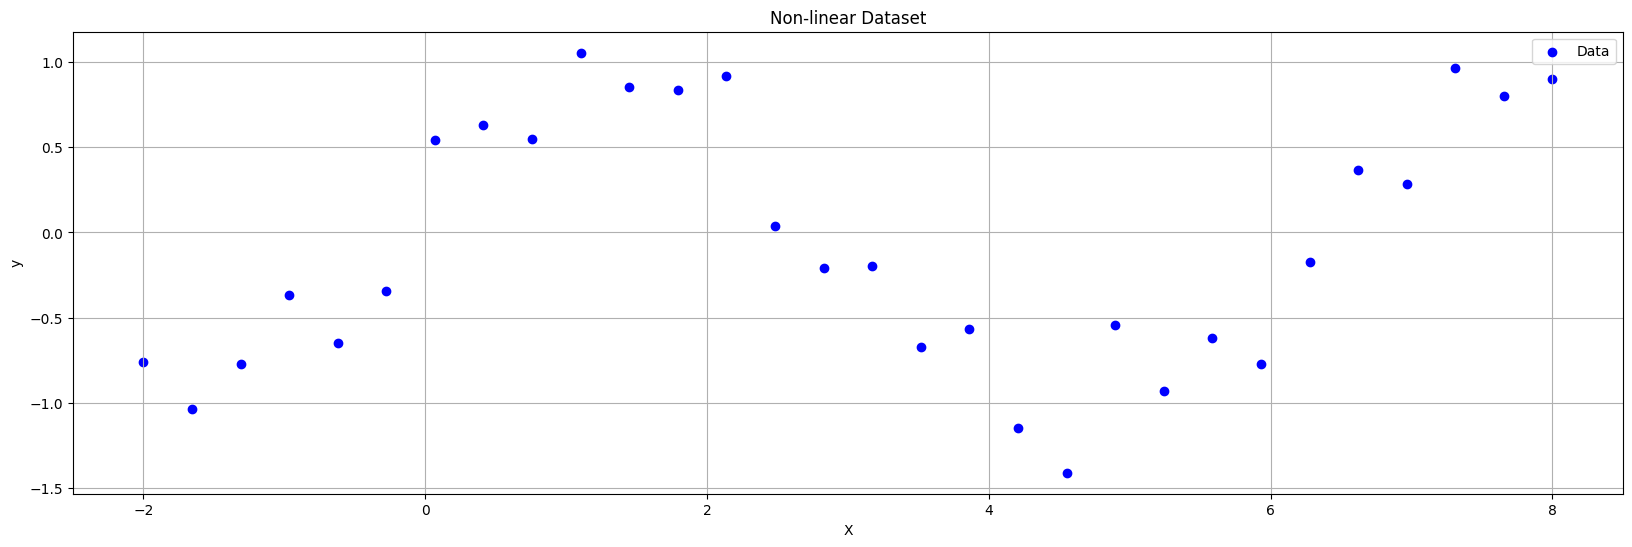

In [22]:
plt.figure(figsize=(20, 6))
plt.scatter(data['X'], data['y'], color='blue', label='Data')
plt.title('Non-linear Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

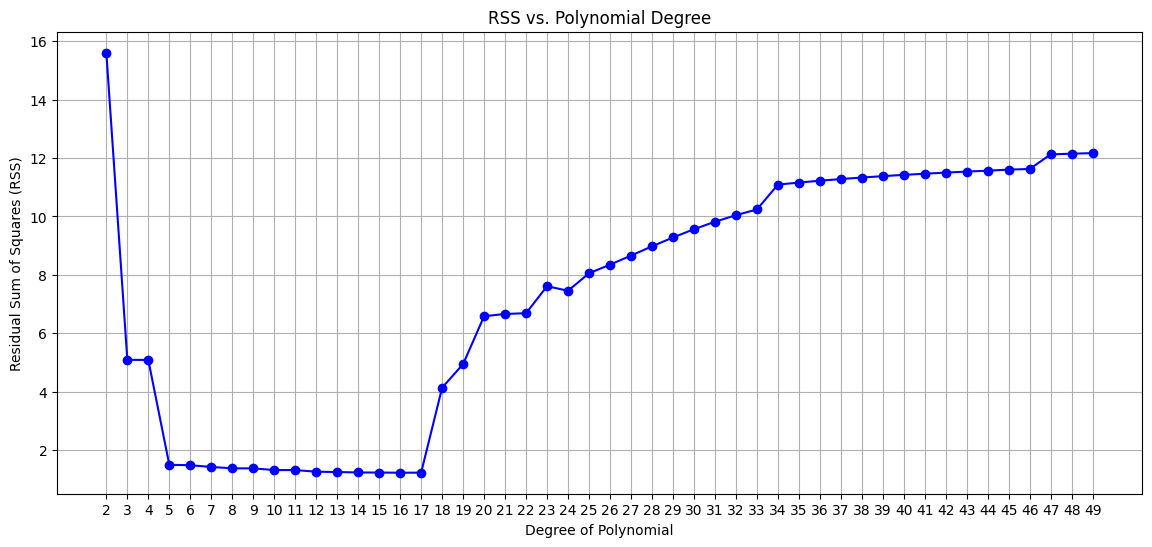

In [23]:
rss_values = []
for degree in range(2, 50):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    residuals = y - y_pred
    rss = np.sum(residuals**2)
    rss_values.append(rss)

plt.figure(figsize=(14, 6))
plt.plot(range(2, 50), rss_values, marker='o', linestyle='-', color='b')
plt.title('RSS vs. Polynomial Degree')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Residual Sum of Squares (RSS)')
plt.grid(True)
plt.xticks(range(2, 50))
plt.show()

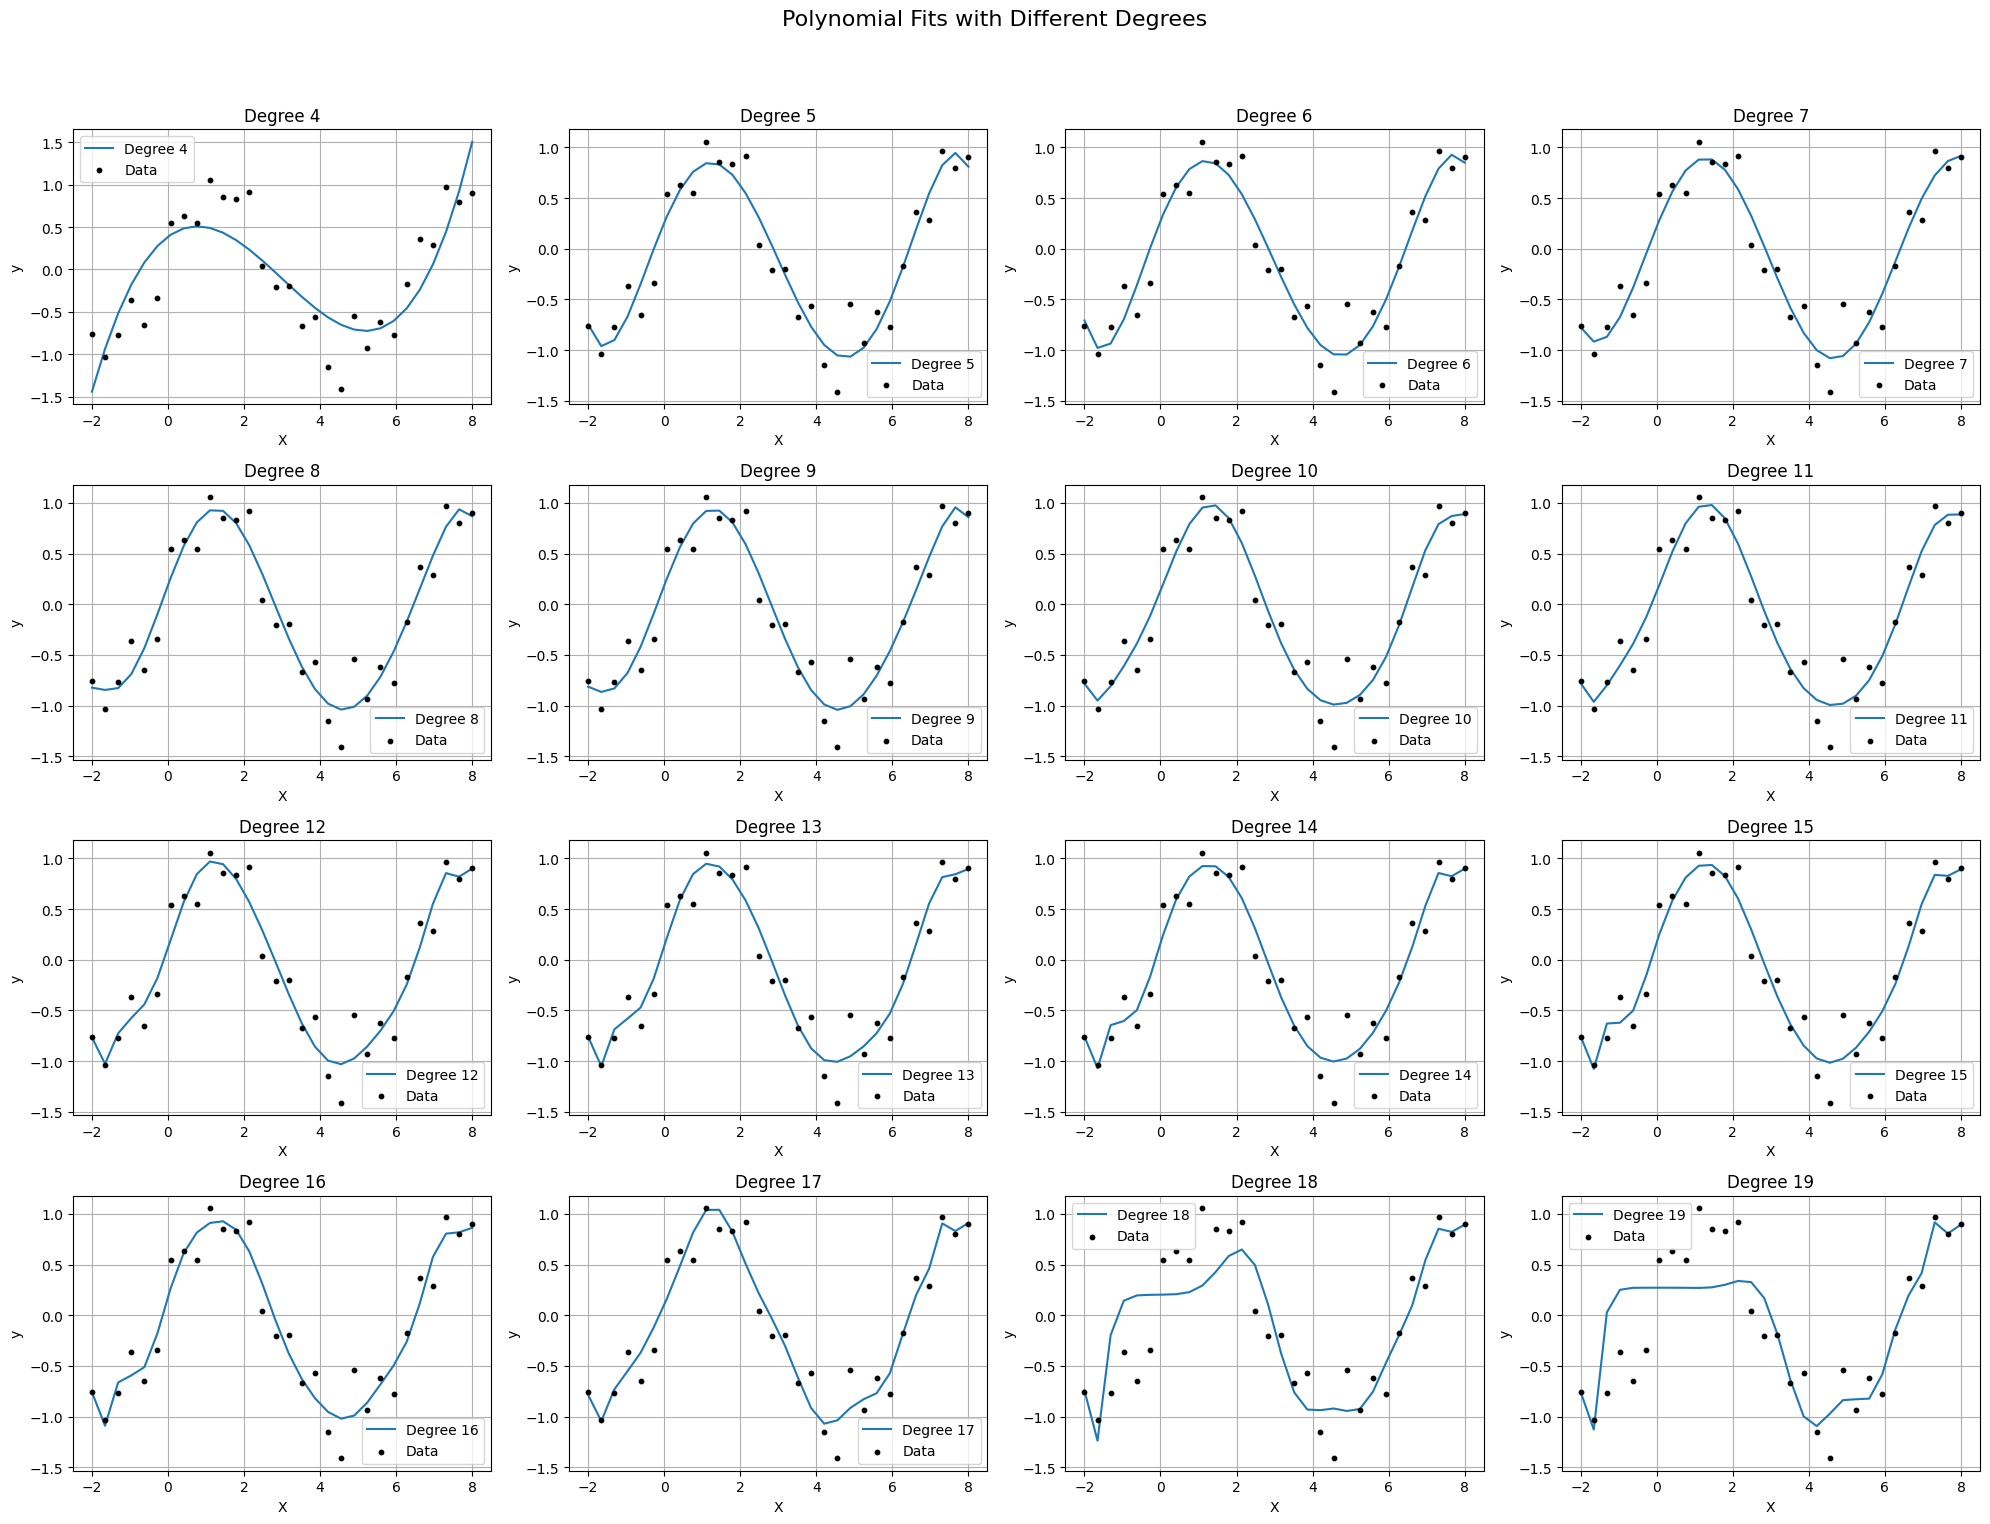

In [5]:
fig, axs = plt.subplots(4, 4, figsize=(20, 16))
fig.suptitle('Polynomial Fits with Different Degrees', fontsize=16)

for i, degree in enumerate(range(4, 20)):
    row = i // 4
    col = i % 4

    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)

    axs[row, col].plot(X, y_pred, label=f'Degree {degree}')
    axs[row, col].scatter(X, y, color='black', s=10, label='Data', zorder=5)
    axs[row, col].set_title(f'Degree {degree}')
    axs[row, col].set_xlabel('X')
    axs[row, col].set_ylabel('y')
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

choose the high degrees make to high features

features*degrees = numbers of new_features

In [18]:
np.random.seed(42)
X = np.array(np.linspace(-2, 8, 30))
noise = np.random.normal(0, 0.3, size=X.shape)
y = np.sin(X) + noise
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X.reshape(-1, 1))

print("Original X:")
print(X)

print("Transformed Polynomial Features:")
print(X_poly)

print("Feature Names:")
print(poly.get_feature_names_out())

Original X:
[-2.         -1.65517241 -1.31034483 -0.96551724 -0.62068966 -0.27586207
  0.06896552  0.4137931   0.75862069  1.10344828  1.44827586  1.79310345
  2.13793103  2.48275862  2.82758621  3.17241379  3.51724138  3.86206897
  4.20689655  4.55172414  4.89655172  5.24137931  5.5862069   5.93103448
  6.27586207  6.62068966  6.96551724  7.31034483  7.65517241  8.        ]
Transformed Polynomial Features:
[[ 1.00000000e+00 -2.00000000e+00  4.00000000e+00 -8.00000000e+00]
 [ 1.00000000e+00 -1.65517241e+00  2.73959572e+00 -4.53450326e+00]
 [ 1.00000000e+00 -1.31034483e+00  1.71700357e+00 -2.24986674e+00]
 [ 1.00000000e+00 -9.65517241e-01  9.32223543e-01 -9.00077904e-01]
 [ 1.00000000e+00 -6.20689655e-01  3.85255648e-01 -2.39124195e-01]
 [ 1.00000000e+00 -2.75862069e-01  7.60998811e-02 -2.09930706e-02]
 [ 1.00000000e+00  6.89655172e-02  4.75624257e-03  3.28016729e-04]
 [ 1.00000000e+00  4.13793103e-01  1.71224732e-01  7.08516134e-02]
 [ 1.00000000e+00  7.58620690e-01  5.75505351e-01  4.

Solve Overfitting
- Grid Search
- Bayesian Optimization
- TPOTRegresser
- H2O.ai
- Manual Search
- Learning Curve Analysis
- Regularization Techniques (Ridge/Lasso)
- Validation Curves

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1776: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 23 instead of 50.
  warnings.warn(


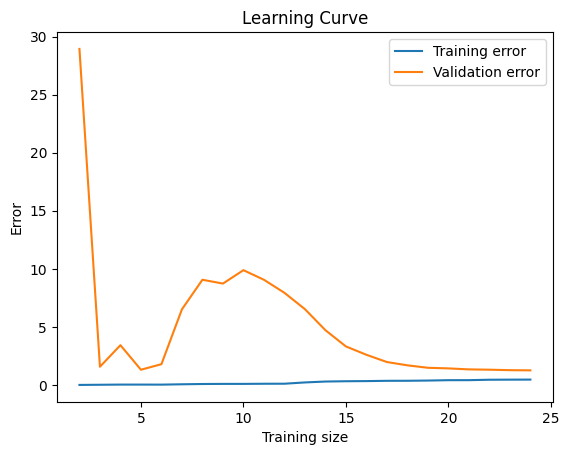

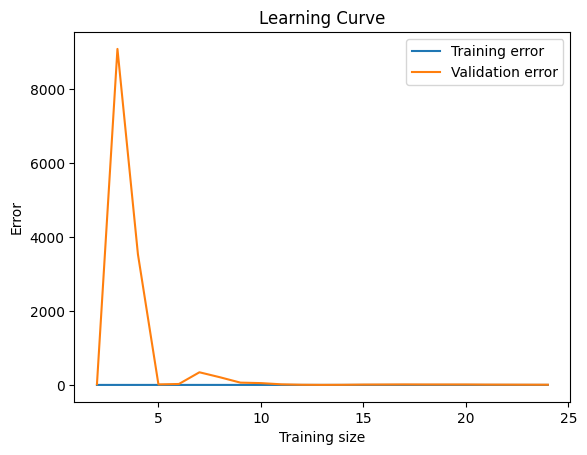

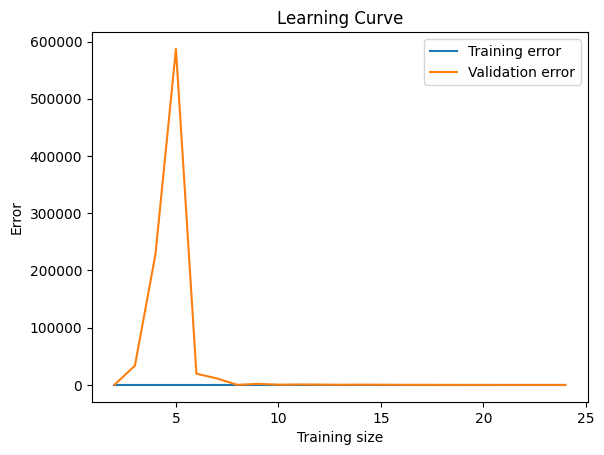

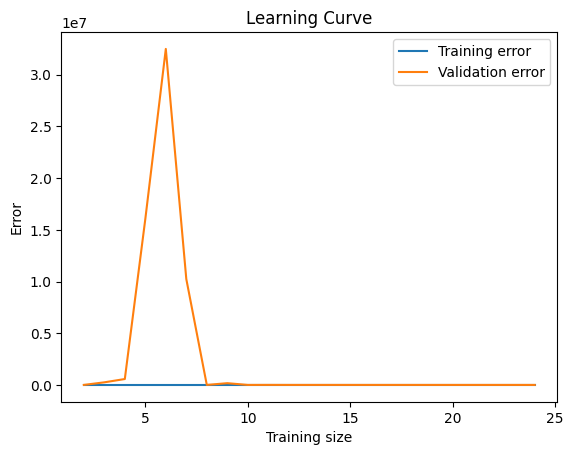

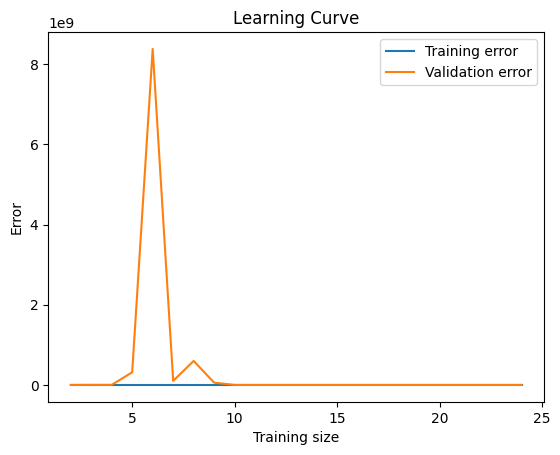

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50))
    train_scores_mean = -train_scores.mean(axis=1)
    val_scores_mean = -val_scores.mean(axis=1)

    plt.figure()
    plt.plot(train_sizes, train_scores_mean, label='Training error')
    plt.plot(train_sizes, val_scores_mean, label='Validation error')
    plt.xlabel('Training size')
    plt.ylabel('Error')
    plt.legend()
    plt.title('Learning Curve')
    plt.show()

degrees = [1, 2, 3, 4, 5]

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    plot_learning_curve(model, X, y)
